Importamos las librerías necesarias para que los gráficos se generen. Además se importa la librería de **Google Drive** para guardar las imágenes en la raíz de la unidad del usuario que ejecute el script.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from math import isnan

Definimos la función `add_labels(x, y, ha, va)` para agregar la etiqueta con el valor, en los trimestres 8 y 12.

In [44]:
def add_labels(x, y, ha = 'center', va = 'top'):
    if (isnan(y[1])):
        for i in range(len(x)):
            if (i == 7 or i == 11):
                plt.text(i + 1, y[i], round(y[i], 2), ha=ha, va=va, fontsize=12, 
                bbox = dict(facecolor='white', edgecolor='black', alpha=0.6, boxstyle='round'))

Generamos el gráfico compartido para RC y PA. Se realizan los siguiente pasos:

1. Se configuran los **estílos** de los gráficos. Estos estílos **se mantendrán hasta el final**, o hasta que se cambien de nuevo.
2. Se importa el archivo `liquidez.csv`, en la raíz del proyecto.
3. Se generan los ejes, títulos y etiquetas.
4. Se guarda el archivo PNG en la carpeta, con el nombre `liquidez.png`.
5. Se muestra el gráfico en el Jupyter Notebook.

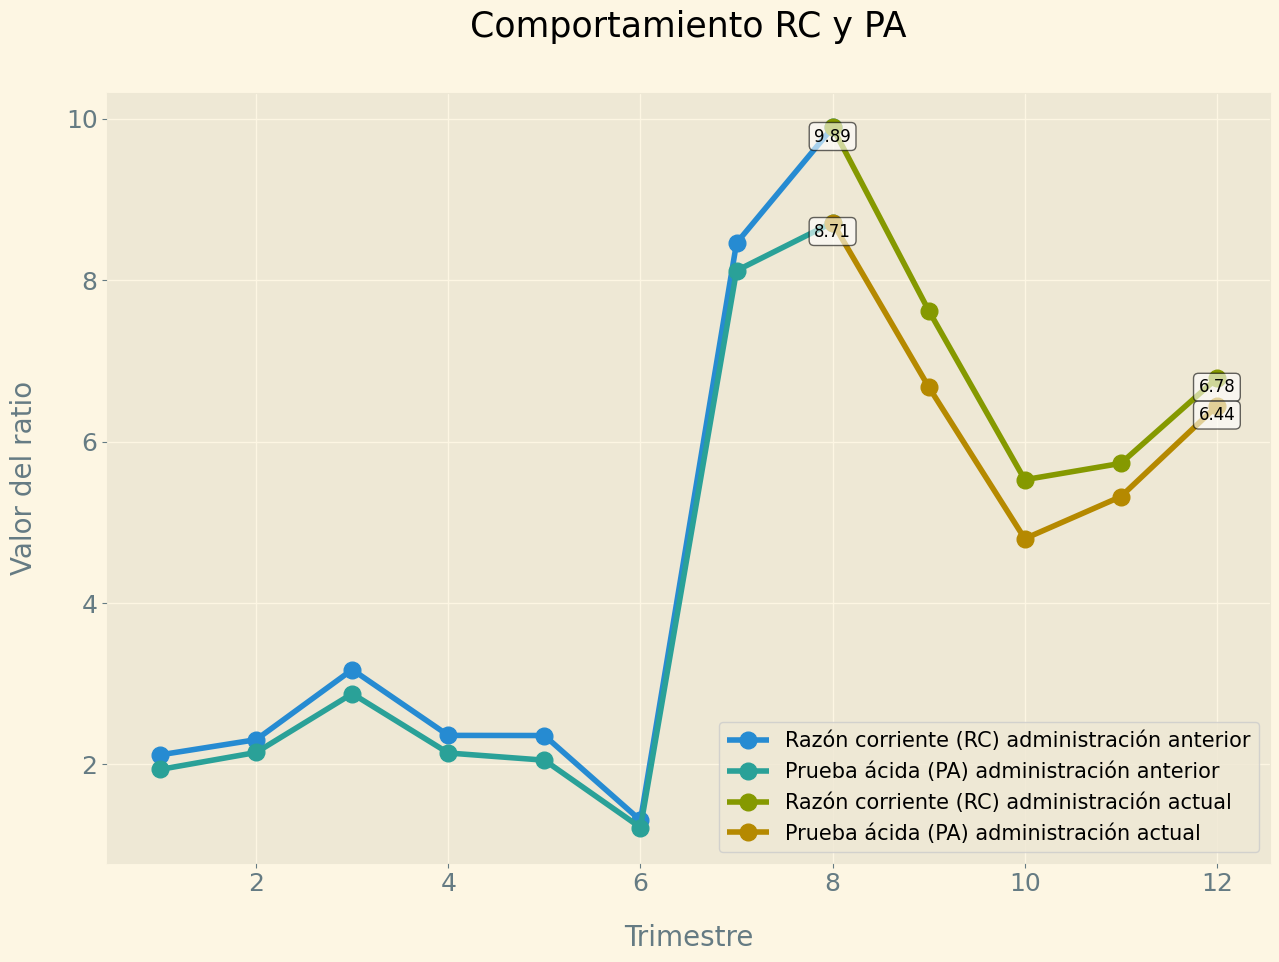

In [45]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('Solarize_Light2')

headers = ['Trimestre', 'Razón corriente (RC) administración anterior', 'Prueba ácida (PA) administración anterior', 'Razón corriente (RC) administración actual', 'Prueba ácida (PA) administración actual']

df = pd.read_csv('liquidez.csv', sep=';', usecols=headers)

df.set_index('Trimestre').plot(linewidth=4, linestyle='-', marker='o', markersize=12, legend=False)

add_labels(df['Trimestre'], df['Razón corriente (RC) administración anterior'], ha='center', va='top')
add_labels(df['Trimestre'], df['Prueba ácida (PA) administración anterior'], ha='center', va='top')
add_labels(df['Trimestre'], df['Razón corriente (RC) administración actual'], ha='center', va='top')
add_labels(df['Trimestre'], df['Prueba ácida (PA) administración actual'], ha='center', va='top')

plt.legend(loc='lower right', fontsize=15)

plt.title('Comportamiento RC y PA', fontsize=25, pad=40)
plt.xlabel('Trimestre', fontsize=20, labelpad=20)
plt.ylabel('Valor del ratio', fontsize=20, labelpad=20)

plt.savefig('liquidez.png', dpi=300, bbox_inches='tight', pad_inches=0.75)
plt.show()